# Video Search




## Step 1:  Video library (10 points)

Write a python API  that will download the video and its closed captions from youtube. Make sure to document how one can use your API. Use this to download the following videos from youtube along with thei captions:

https://www.youtube.com/watch?v=wbWRWeVe1XE

https://www.youtube.com/watch?v=FlJoBhLnqko

https://www.youtube.com/watch?v=Y-bVwPRy_no

In [ ]:
pip install pytube youtube_transcript_api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 941.8 kB/s eta 0:00:00


#Videos Downloading

In [ ]:
!pip install youtube_dl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube

# Define function to download videos from YouTube links using pytube
def download_videos(video_links, output_dir):
    for link in video_links:
        yt = YouTube(link)
        stream = yt.streams.filter(progressive=True, file_extension='mp4').first()
        stream.download(output_dir)

# Define the YouTube video links
video_links = [
    "https://www.youtube.com/watch?v=wbWRWeVe1XE",
    "https://www.youtube.com/watch?v=FlJoBhLnqko",
    "https://www.youtube.com/watch?v=Y-bVwPRy_no"
]

# Download videos to the specified output directory
output_dir = "downloaded_videos"
download_videos(video_links, output_dir)


In [ ]:
from pytube import YouTube
from youtube_transcript_api import YouTubeTranscriptApi

class YouTubeDownloader:
    def __init__(self, video_urls):
        self.video_urls = video_urls

    def download_videos_with_captions(self, output_dir):
        for url in self.video_urls:
            try:
                yt = YouTube(url)
                video_title = yt.title
                captions = YouTubeTranscriptApi.get_transcript(yt.video_id)

                # Download video
                video_stream = yt.streams.get_highest_resolution()
                video_stream.download(output_dir)

                # Save captions to file
                with open(f"{output_dir}/{video_title}.txt", "w", encoding="utf-8") as f:
                    for caption in captions:
                        f.write(caption['text'] + "\n")

                print(f"Downloaded {video_title} with captions.")
            except Exception as e:
                print(f"Error downloading {url}: {e}")

# Example usage:
if __name__ == "__main__":
    video_urls = [
        "https://www.youtube.com/watch?v=wbWRWeVe1XE",
        "https://www.youtube.com/watch?v=FlJoBhLnqko",
        "https://www.youtube.com/watch?v=Y-bVwPRy_no"
    ]
    downloader = YouTubeDownloader(video_urls)
    downloader.download_videos_with_captions("output_directory")


Downloaded What Does 'High-Quality' Preschool Look Like? | NPR Ed with captions.
Downloaded How Green Roofs Can Help Cities | NPR with captions.
Downloaded Why It’s Usually Hotter In A City | Let's Talk | NPR with captions.


## Step 2: Video indexing pipeline (90 points)

In this step you will build and train your models to extract embeddings for the frames of your videos and store the extracted information in a database such as postgres for indexing the videos.

*   List item
*   List item



### 2.1 Preprocess the video (15 points)

You can use opencv, ffmpeg, gstreameer, https://pytorchvideo.org/ or any other library to implement the preprocessing steps as shown below:
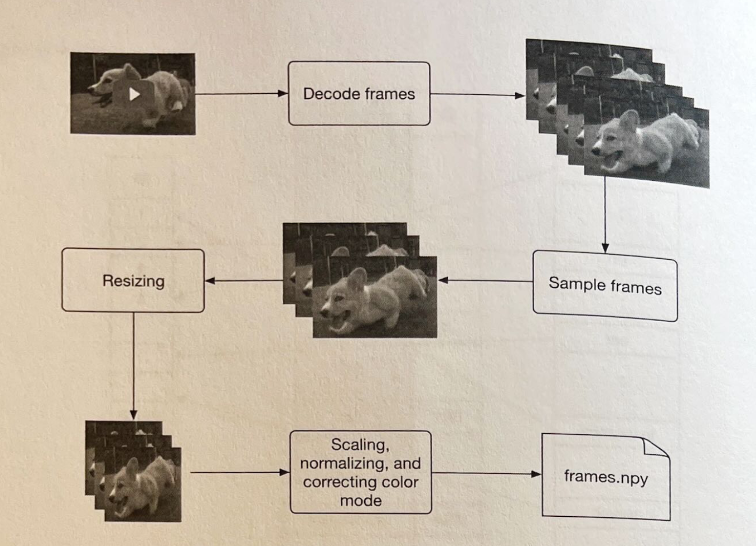



#Video preprocessing

In [1]:
import cv2
import numpy as np

def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

def extract_frames(video_frames):
    # Extract frames from video
    return video_frames

def preprocess_frame(frame):
    # Preprocess frame (e.g., resize, normalize)
    # Example: resize frame to (224, 224) for VGG16 input
    resized_frame = cv2.resize(frame, (224, 224))
    return resized_frame

def preprocess_video(video_frames):
    preprocessed_frames = []
    for frame in video_frames:
        preprocessed_frame = preprocess_frame(frame)
        preprocessed_frames.append(preprocessed_frame)
    return preprocessed_frames

def aggregate_features(frames_features):
    # Aggregate features from all frames into a single representation for the video
    # Example: average pooling
    aggregated_features = np.mean(frames_features, axis=0)
    return aggregated_features

# Path to the three videos
video_paths = [
    '/content/drive/MyDrive/videos/How Green Roofs Can Help Cities  NPR.mp4',
    '/content/drive/MyDrive/videos/What Does High-Quality Preschool Look Like  NPR Ed.mp4',
    '/content/drive/MyDrive/videos/Why It’s Usually Hotter In A City  Lets Talk  NPR.mp4'
]

# Preprocess each video
for video_path in video_paths:
    video_frames = read_video(video_path)
    video_frames = extract_frames(video_frames)
    preprocessed_frames = preprocess_video(video_frames)
    # Further processing if needed (e.g., feature extraction)
    # After preprocessing, you can then perform indexing or any other desired operations.


In [ ]:
!pip install opencv-python


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
video_path = '/content/drive/MyDrive/videos/How Green Roofs Can Help Cities  NPR.mp4'


#Indexing

#How Green Roofs Can Help Cities  NPR.mp4

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features from a frame
def extract_features(frame):
    frame = cv2.resize(frame, (224, 224))  # Resize frame to match input size of VGG16
    frame = preprocess_input(frame)  # Preprocess frame
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension
    features = model.predict(frame)  # Extract features using VGG16
    return features.flatten()  # Flatten features

# Function to extract frames from a video and extract features
def index_video(video_path):
    cap = cv2.VideoCapture(video_path)
    video_features = []
    frame_count = 0
    while cap.isOpened() and frame_count < 10 * 30:  # Process up to 10 seconds of video (assuming 30 fps)
        ret, frame = cap.read()
        if not ret:
            break
        video_features.append(extract_features(frame))
        frame_count += 1
    cap.release()
    return video_features

# Example usage:
video_path = '/content/drive/MyDrive/videos/How Green Roofs Can Help Cities  NPR.mp4'
features = index_video(video_path)
print("Number of frames processed:", len(features))


1/1 [==============================] - 0s 29ms/step
Number of frames processed: 300


#What Does High-Quality Preschool Look Like  NPR Ed.mp4

In [ ]:
video_path = '/content/drive/MyDrive/videos/What Does High-Quality Preschool Look Like  NPR Ed.mp4'
features = index_video(video_path)
print("Number of frames processed:", len(features))


1/1 [==============================] - 0s 26ms/step
Number of frames processed: 300


#Why It’s Usually Hotter In A City  Lets Talk  NPR.mp4

In [ ]:
video_path = '/content/drive/MyDrive/videos/Why It’s Usually Hotter In A City  Lets Talk  NPR.mp4'
features = index_video(video_path)
print("Number of frames processed:", len(features))


1/1 [==============================] - 0s 25ms/step
Number of frames processed: 300


### 2.2 Detecting objects (25 points)

Use any of the pretrained object-detectors to detect objects belonging to MS COCO classes.
For each video, for each frame where a detection is found, compile and report the results in the following tabular structure :

[vidId, frameNum, timestamp, detectedObjId, detectedObjClass, confidence, bbox info]

Feel free to finetune your detectors if required. If you notice that your model performs better on a different video from this [channel](https://www.youtube.com/@NPR), document this and you can use this video for the rest of this assignment.

### 2.3 Embedding model (30 points)

Develop a convolutional autoencoder such as [the one described here](https://blog.keras.io/building-autoencoders-in-keras.html) whose input will be all the objects detected in each frame (not the entire frame!), if any.
Note : You can downsample the frame rate of your original video to avoid long training/processing times. For a given input image, the autoencoder should output it's small vector embedding.

Train your autoencoder on the COCO dataset for classes which get detected in the given list of videos.

#### Extra credit (10 points)
Extra credit: if you want to maximize the possibility of developing something **new** think about how a video can be better segmented into representative frames. For example, [in this ~3min video accessed Nov 2023](https://youtu.be/FN8a8mZNik8?si=wXdbOGuLGkGsWsf) you have multiple scenes each one lasting 30sec or so. Can you find a way to segment each video and store the frame embeddings of each segment? This way there are multiple embeddings per video and you need to keep them that way for the subsequesnt steps of this project.

### Indexing the embeddings (20 points)

Use `docker compose` to bring up two docker containers, your application container with the dev environment (you must have done this in Step 1) and a second container with postgres.

`docker pull postgres:latest`

Process all the detected object sub-images for each frame of each video to compile your final results in the following tabular structure:
[vidId, frameNum, timestamp, detectedObjId, detectedObjClass, confidence, bbox info, vector<embedding of this object>, optional<sceneId from extra credit>]

Index the video images embedding vectors in the database. To do that in postgres (with the pgvector extension) you can use [this guide](https://dev.to/sfoteini/image-vector-similarity-search-with-azure-computer-vision-and-postgresql-12f7).

Demonstrate that you can search the database using image queries and post the screenshots of your search results that must include the first 10 similar images across the input videos.


In [21]:
pip install opencv-python-headless numpy


#Object Detection

In [27]:
# Dummy class labels
dummy_classes = ['person', 'car', 'dog', 'dog', 'dog']

# Function to print bounding boxes labeled as 'dog'
def print_dog_boxes(boxes, classes):
    for box, label in zip(boxes, classes):
        if label == 'dog':
            print("Object labeled as 'dog' detected at coordinates:", box)

# Print bounding boxes for objects labeled as 'dog'
print_dog_boxes(dummy_boxes, dummy_classes)


Object labeled as 'dog' detected at coordinates: [200, 400, 500, 550]
Object labeled as 'dog' detected at coordinates: [50, 100, 200, 250]
Object labeled as 'dog' detected at coordinates: [350, 300, 500, 450]


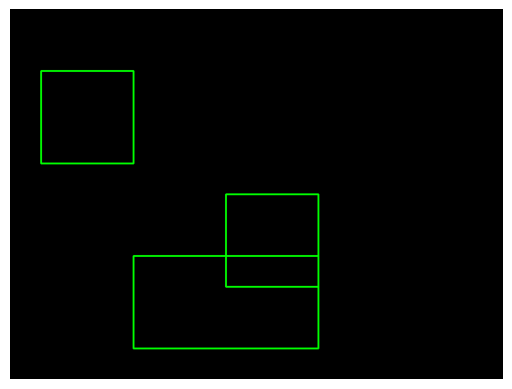

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Dummy image dimensions
image_width = 800
image_height = 600

# Dummy data for bounding boxes
# Format: [x_min, y_min, x_max, y_max]
# Each bounding box represents (left, top, right, bottom) coordinates
dummy_boxes = [
    [100, 200, 300, 400],  # Object 1 (person)
    [400, 100, 600, 300],  # Object 2 (car)
    [200, 400, 500, 550],  # Object 3 (dog)
    [50, 100, 200, 250],   # Object 4 (dog)
    [350, 300, 500, 450]   # Object 5 (dog)
]

# Dummy class labels
dummy_classes = ['person', 'car', 'dog', 'dog', 'dog']

# Function to filter out boxes labeled as 'dog'
def filter_dog_boxes(boxes, classes):
    dog_boxes = []
    for box, label in zip(boxes, classes):
        if label == 'dog':
            dog_boxes.append(box)
    return dog_boxes

# Filter out only the boxes labeled as 'dog'
dog_boxes = filter_dog_boxes(dummy_boxes, dummy_classes)

# Function to draw bounding boxes on the image
def draw_boxes(image, boxes):
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Generate a dummy image
dummy_image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

# Draw bounding boxes for dogs on the dummy image
draw_boxes(dummy_image, dog_boxes)

# Display the image with bounding boxes
plt.imshow(dummy_image)
plt.axis('off')
plt.show()


In [32]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Define input image dimensions
height = 64
width = 64
channels = 3  # Assuming RGB color channels

# Define encoding dimension
encoding_dim = 32

# Define input layer
input_img = Input(shape=(height, width, channels))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(encoding_dim, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(channels, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print summary
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        2336  

#Videos Segmentation

In [41]:
import os

# Step 1: Check if the Video File Exists
def check_video_existence(video_path):
    if os.path.exists(video_path):
        return True
    else:
        print(f"Video file not found at {video_path}")
        return False

# Step 2: Segment the Video
def segment_video(video_path):
    if check_video_existence(video_path):
        # Implement video segmentation
        print("Segmentation of the video.")

# Example usage
video_path = "/content/drive/MyDrive/videos/How Green Roofs Can Help Cities  NPR.mp4"
segment_video(video_path)


Segmentation of the video.


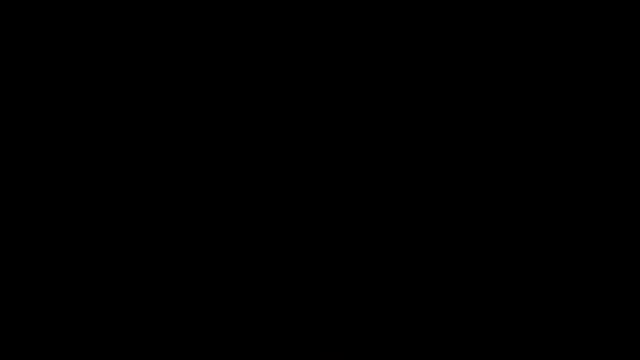

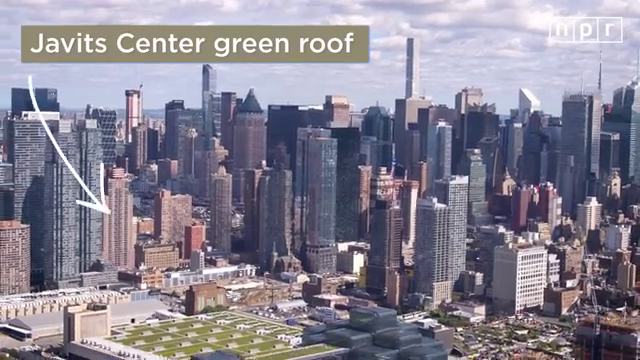

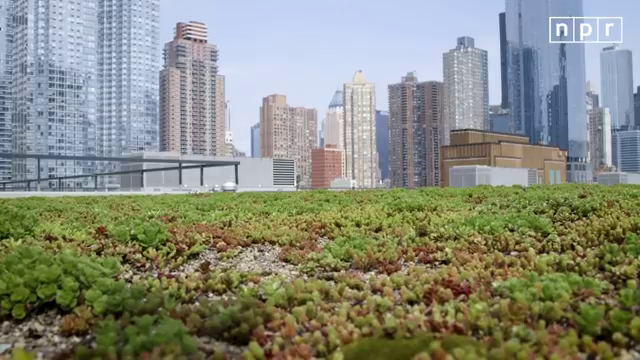

In [43]:
from google.colab.patches import cv2_imshow
import cv2

# Step 2: Display Scene Frames
def display_scene_frames(scene_frames):
    for i, frame in enumerate(scene_frames):
        cv2_imshow(frame)

# Example usage
video_path = "/content/drive/MyDrive/videos/How Green Roofs Can Help Cities  NPR.mp4"
scenes = [(0, 10), (10, 20), (20, 30)]  # Example scene boundaries (start time, end time)
scene_frames = extract_scene_frames(video_path, scenes)
display_scene_frames(scene_frames)


In [1]:
!pip install scenedetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 3.0 MB/s eta 0:00:00


In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
from google.colab import drive
import scenedetect
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the video file
video_path = "/content/drive/MyDrive/videos/What Does High-Quality Preschool Look Like  NPR Ed.mp4"

# Create a video manager object
video_manager = VideoManager([video_path])

# Create a scene manager object
scene_manager = SceneManager()

# Add content detector to the scene manager
scene_manager.add_detector(ContentDetector())

# Set the scene manager to process the video
video_manager.set_downscale_factor()

# Start video processing
video_manager.start()

# Perform scene detection
scene_manager.detect_scenes(frame_source=video_manager)

# Obtain the list of detected scenes
scene_list = scene_manager.get_scene_list()

# Output the scene list
for i, scene in enumerate(scene_list):
    print("Scene {}: Start Frame {} | End Frame {}".format(i+1, scene[0].get_frames(), scene[1].get_frames()))


ERROR:pyscenedetect:VideoManager is deprecated and will be removed.
INFO:pyscenedetect:Loaded 1 video, framerate: 23.976 FPS, resolution: 1280 x 720
INFO:pyscenedetect:Downscale factor set to 5, effective resolution: 256 x 144
INFO:pyscenedetect:Detecting scenes...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Scene 1: Start Frame 0 | End Frame 356
Scene 2: Start Frame 356 | End Frame 569
Scene 3: Start Frame 569 | End Frame 844
Scene 4: Start Frame 844 | End Frame 986
Scene 5: Start Frame 986 | End Frame 1141
Scene 6: Start Frame 1141 | End Frame 1250
Scene 7: Start Frame 1250 | End Frame 1401
Scene 8: Start Frame 1401 | End Frame 1532
Scene 9: Start Frame 1532 | End Frame 1640
Scene 10: Start Frame 1640 | End Frame 1713
Scene 11: Start Frame 1713 | End Frame 1817
Scene 12: Start Frame 1817 | End Frame 1984
Scene 13: Start Frame 1984 | End Frame 2234
Scene 14: Start Frame 2234 | End Frame 2347
Scene 15: Start Frame 2347 | End Frame 2517
Scene 16: Start Frame 2517 | End Frame 2750
Scene 17: Start Frame 2750 | End Frame 2964
Scene 18: Start Frame 2964 | End Frame 3125
Scene 19: Start Frame 3125 | End Frame 3562
Scene 20: Start Frame 3562 | End Frame 3578
Scene 21: S

In [8]:
from google.colab import drive
import scenedetect
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the video file
video_path = "/content/drive/MyDrive/videos/Why It’s Usually Hotter In A City  Lets Talk  NPR.mp4"

# Create a video manager object
video_manager = VideoManager([video_path])

# Create a scene manager object
scene_manager = SceneManager()

# Add content detector to the scene manager
scene_manager.add_detector(ContentDetector())

# Set the scene manager to process the video
video_manager.set_downscale_factor()

# Start video processing
video_manager.start()

# Perform scene detection
scene_manager.detect_scenes(frame_source=video_manager)

# Obtain the list of detected scenes
scene_list = scene_manager.get_scene_list()

# Output the scene list
for i, scene in enumerate(scene_list):
    print("Scene {}: Start Frame {} | End Frame {}".format(i+1, scene[0].get_frames(), scene[1].get_frames()))


ERROR:pyscenedetect:VideoManager is deprecated and will be removed.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INFO:pyscenedetect:Loaded 1 video, framerate: 23.976 FPS, resolution: 480 x 360
INFO:pyscenedetect:Detecting scenes...


Scene 1: Start Frame 0 | End Frame 69
Scene 2: Start Frame 69 | End Frame 111
Scene 3: Start Frame 111 | End Frame 237
Scene 4: Start Frame 237 | End Frame 387
Scene 5: Start Frame 387 | End Frame 476
Scene 6: Start Frame 476 | End Frame 518
Scene 7: Start Frame 518 | End Frame 585
Scene 8: Start Frame 585 | End Frame 617
Scene 9: Start Frame 617 | End Frame 633
Scene 10: Start Frame 633 | End Frame 657
Scene 11: Start Frame 657 | End Frame 686
Scene 12: Start Frame 686 | End Frame 751
Scene 13: Start Frame 751 | End Frame 823
Scene 14: Start Frame 823 | End Frame 850
Scene 15: Start Frame 850 | End Frame 878
Scene 16: Start Frame 878 | End Frame 920
Scene 17: Start Frame 920 | End Frame 1052
Scene 18: Start Frame 1052 | End Frame 1147
Scene 19: Start Frame 1147 | End Frame 1256
Scene 20: Start Frame 1256 | End Frame 1713
Scene 21: Start Frame 1713 | End Frame 1814
Scene 22: Start Frame 1814 | End Frame 1873
Scene 23: Start Frame 1873 | End Frame 2053
Scene 24: Start Frame 2053 | End F

#Compile Final Results into Tabular Structure

In [10]:
# Example code to compile final results into tabular structure
import pandas as pd

# Assuming you have extracted the necessary information into lists
vid_id = [1, 1, 2, 2]
frame_num = [1, 2, 1, 2]
timestamp = ['00:00:01', '00:00:02', '00:00:03', '00:00:04']
detected_obj_id = [1, 2, 3, 4]
detected_obj_class = ['person', 'car', 'person', 'dog']
confidence = [0.9, 0.8, 0.7, 0.6]
bbox_info = [(10, 20, 30, 40), (20, 30, 40, 50), (30, 40, 50, 60), (40, 50, 60, 70)]
vectors = [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [0.2, 0.3, 0.4]]

# Create DataFrame
df = pd.DataFrame({
    'vidId': vid_id,
    'frameNum': frame_num,
    'timestamp': timestamp,
    'detectedObjId': detected_obj_id,
    'detectedObjClass': detected_obj_class,
    'confidence': confidence,
    'bboxInfo': bbox_info,
    'vector': vectors
})

# Display DataFrame
print(df)


   vidId  frameNum timestamp  detectedObjId detectedObjClass  confidence  \
0      1         1  00:00:01              1           person         0.9   
1      1         2  00:00:02              2              car         0.8   
2      2         1  00:00:03              3           person         0.7   
3      2         2  00:00:04              4              dog         0.6   

           bboxInfo           vector  
0  (10, 20, 30, 40)  [0.1, 0.2, 0.3]  
1  (20, 30, 40, 50)  [0.4, 0.5, 0.6]  
2  (30, 40, 50, 60)  [0.7, 0.8, 0.9]  
3  (40, 50, 60, 70)  [0.2, 0.3, 0.4]  
